A block of fixed potential 1V present in the space

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter
from matplotlib import cm
import numba
from numba import jit

In [20]:
edge = np.linspace(-1 , 1 , 300)

In [21]:
xv , yv = np.meshgrid(edge , edge)

In [22]:
def potential_block(x,y):
    return np.select([(x>0.5) & (x<0.7) & (y>0.5) & (y<0.7), (x<0.5) & (x>0.7) & (y<0.5) & (y>0.7)] , [-4 , 0 ])

In [23]:
fixed = potential_block(xv,yv)
fixed_bool = fixed != 0   #assign True to all the points where the points is not equal to 0

In [24]:
fixed_bool

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

Modify the compute potential function so that it does not set to modify the points inside the box

In [25]:
@numba.jit("f8[:,:](f8[:,:], b1[:,:], i8)", nopython = True, nogil=True)
def compute_potential(potential , fixed_bool , n_iter):
    length = len(potential[0])  # potential[0] == potential[0,:]  
    for n in range(n_iter):
        for i in range(1, length-1):
            for j in range(1 , length-1):
                if not(fixed_bool[j,i]):
                    potential[j , i ] = (1/4)*(potential[j,i+1] + potential[j,i-1] + potential[j+1,i] + potential[j-1,i])
    return potential

In [26]:
# plt.contourf(xv ,yv , potential_block(xv,yv))

In [27]:
# potential = potential_block(xv,yv)
# potential

In [28]:
#B.C.
upper_y = np.cos(np.pi*edge/2)
lower_y = edge**4
upper_x = 1/(np.e**(-1) - np.e) * (np.exp(edge) - np.e)
lower_x = 0.5*(edge**2 - edge)

In [29]:
potential = np.zeros((300,300))
potential[:,-1] = -2
potential[:, 0] = 0.5
potential[-1,:] = 2
potential[fixed_bool] = fixed[fixed_bool]
potential[0 ,:] = 0

In [30]:
# potential = potential.astype(np.float64)

In [31]:
compute_potential(potential, fixed_bool , n_iter = 90000)

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.00000000e-01,  2.49968114e-01,  1.51109859e-01, ...,
        -6.04683412e-01, -9.99994436e-01, -2.00000000e+00],
       [ 5.00000000e-01,  3.48762596e-01,  2.49872455e-01, ...,
        -9.99977742e-01, -1.39529433e+00, -2.00000000e+00],
       ...,
       [ 5.00000000e-01,  9.53307122e-01,  1.24957239e+00, ...,
        -5.99617119e-03, -7.93608777e-01, -2.00000000e+00],
       [ 5.00000000e-01,  1.24989310e+00,  1.54626527e+00, ...,
         7.87612610e-01, -1.49904169e-03, -2.00000000e+00],
       [ 2.00000000e+00,  2.00000000e+00,  2.00000000e+00, ...,
         2.00000000e+00,  2.00000000e+00,  2.00000000e+00]])

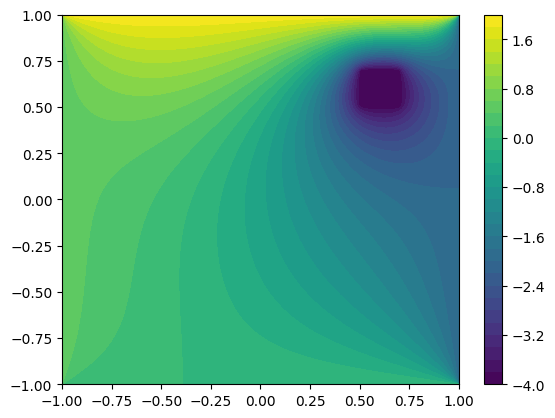

In [32]:
plt.contourf(xv ,yv , potential , 30)
plt.colorbar()

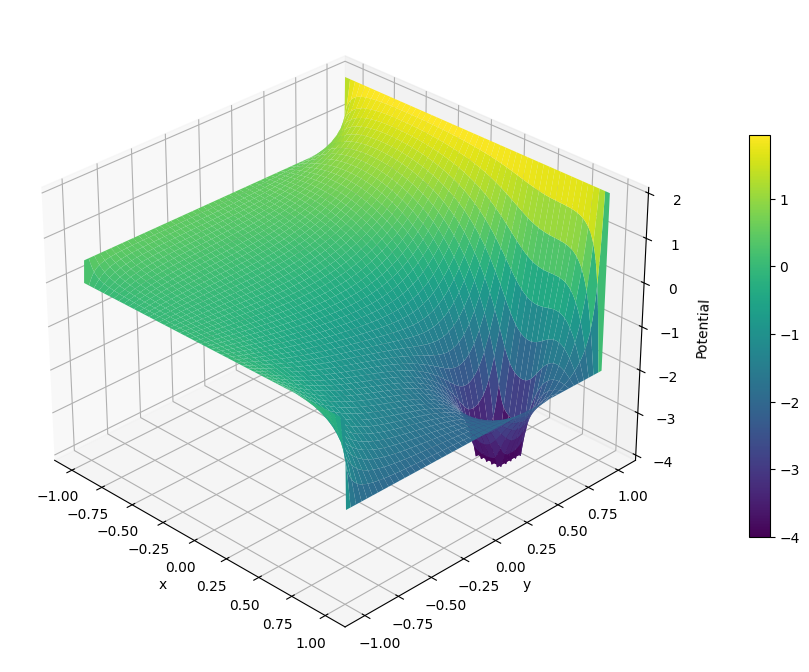

In [40]:
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(
    xv, yv, potential,
    cmap='viridis',
    linewidth=0,
    antialiased=True
)

fig.colorbar(surf, ax=ax, shrink=0.6, pad=0.1)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Potential')

ax.view_init(elev=30, azim=-45)  # good viewing angle

plt.tight_layout()
# plt.savefig("2Dbox.png")
plt.show()


In [34]:
Ex, Ey = np.gradient(-potential)
E_mag = np.sqrt(Ex**2 + Ey**2)

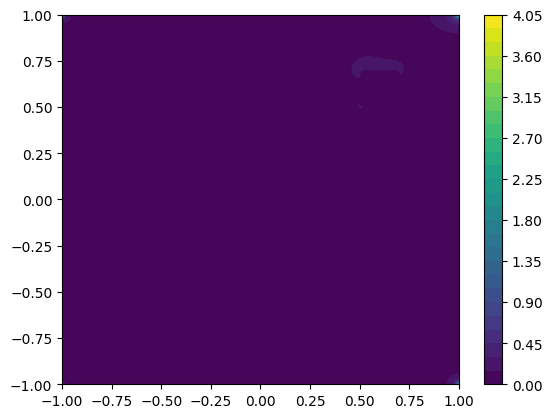

In [38]:
plt.contourf(xv , yv , E_mag  , 30)# Might represent the surface charge densities
plt.colorbar()